In [31]:
import pandas as pd
import matplotlib

%matplotlib inline

In [41]:
"""
export_Cohen_count.log
  nSamples                31
  nVariants       19,478,692
export_INMR_PCRFree_WGS_v6_count.log
  nSamples                34
  nVariants       15,518,081
export_NIAID_count.log
  nSamples               313
  nVariants       34,975,126
INMR_v9_count.log
  nSamples               365
  nVariants          466,717
MYOSEQ_S999_count.log
  nSamples               999
  nVariants          952,001
Pierce_20160819_count.log
  nSamples               130
  nVariants          372,874
walsh_autism_trios_count.log
  nSamples             1,226
  nVariants          826,835
"""

# stats from export
metadata_records = [
    ['dataset_id',  'dataset_type', 'num_samples', 'num_variants'],

    ['cohen',                'wgs',  31,                19478692],
    ['inmr_pcrfree_wgs_v6',  'wgs',  34,                15518081],
    ['niaid',                'wgs',  313,               34975126],

    ['walsh_autism_trios',   'wes',  1226,                826835],
    ['inmr_v9',              'wes',  365,                 466717],
    ['myoseq_s999',          'wes',  999,                 952001],
    ['pierce_20160819',      'wes',  130,                 372874],
]

metadata_table = pd.DataFrame(metadata_records[1:], columns=metadata_records[0])
metadata_table = metadata_table.set_index(list(metadata_table[['dataset_id']]))
metadata_table

,dataset_type,num_samples,num_variants
dataset_id,,,
cohen,wgs,31,19478692
inmr_pcrfree_wgs_v6,wgs,34,15518081
niaid,wgs,313,34975126
walsh_autism_trios,wes,1226,826835
inmr_v9,wes,365,466717
myoseq_s999,wes,999,952001
pierce_20160819,wes,130,372874


In [42]:
num_shards = 3

records = [
    ['dataset_id',     'time (minutes)',                'disk_usage (Kb)',                 'label'],
    ['walsh_autism_trios',  120,                    462728*num_shards,  'solr_with_index_only'],
    ['niaid',              1257,                  11303692*num_shards,  'solr_with_index_only'],
    ['cohen',               611,                   2941692*num_shards,  'solr_with_index_only'],
    ['inmr_v9',              81,                    203324*num_shards,  'solr_with_index_only'],
    ['inmr_pcrfree_wgs_v6', 385,                   2547608*num_shards,  'solr_with_index_only'],

    #['pierce_20160819',    None,                    12345*num_shards,  'solr_with_index_only'],
    #['myoseq_s999',        None,                    12345*num_shards,  'solr_with_index_only'],

    ['walsh_autism_trios',  120,      None,                'solr_with_index_only__single_collection'],
    ['cohen',               269,      None,                'solr_with_index_only__single_collection'],
    ['niaid',               877,      None,                'solr_with_index_only__single_collection'],
    ['inmr_pcrfree_wgs_v6', 156,      None,                'solr_with_index_only__single_collection'],
    ['pierce_20160819',      44,      None,                'solr_with_index_only__single_collection'],
    ['myoseq_s999',          82,      None,                'solr_with_index_only__single_collection'],
    ['inmr_v9',              50,      None,                'solr_with_index_only__single_collection'],

    ['cohen',                   934,     12115248*num_shards,     'solr_with_ref_stored'],
    ['inmr_v9',                 113,      2288816*num_shards,     'solr_with_ref_stored'],
    ['myoseq_s999',             584,     13696504*num_shards,     'solr_with_ref_stored'],
    ['niaid',                  3702,    145852648*num_shards,     'solr_with_ref_stored'],
    ['pierce_20160819',          84,       822036*num_shards,     'solr_with_ref_stored'],
    ['walsh_autism_trios',      697,     15104484*num_shards,     'solr_with_ref_stored'],

    ['myoseq_s999',             7*24*60+6*60,        None,      'mongodb'],  # 
    ['pierce_20160819',              6*60+12,        None,      'mongodb'],
    ['inmr_pcrfree_wgs_v6', 7*60+9 + 4*60+46,        None,      'mongodb'],
    ['inmr_v9',                     21*24+22,       11412,      'mongodb'],



    ['cohen',                   None,     6380000,     'vcf.gz'],
    ['inmr_v9',                 None,      658514,     'vcf.gz'],
    ['myoseq_s999',             None,     4081710,     'vcf.gz'],
    ['niaid',                   None,    65350188,     'vcf.gz'],
    ['pierce_20160819',         None,      378891,     'vcf.gz'],
    ['inmr_pcrfree_wgs_v6',     None,     4518535,     'vcf.gz'],

    ['cohen',                    None,     5594808,     'vds'],
    ['inmr_v9',                  None,      586300,     'vds'],
    ['myoseq_s999',              None,     2853196,     'vds'],
    ['niaid',                    None,    45931140,     'vds'],
    ['pierce_20160819',          None,       549616,    'vds'],
    ['inmr_pcrfree_wgs_v6',      None,      4412596,    'vds'],

    ['cohen',                    88,       None,     'annotation_time'],
    ['inmr_v9',                  112,       None,     'annotation_time'],
    ['myoseq_s999',              96,       None,     'annotation_time'],
    ['niaid',                    159,       None,     'annotation_time'],
    ['pierce_20160819',          57,       None,     'annotation_time'],
    ['inmr_pcrfree_wgs_v6',      133,       None,     'annotation_time'],


]


table = pd.DataFrame(records[1:], columns=records[0])
table = table.set_index(list(table[['dataset_id']]))

In [43]:
pivoted_table = table.pivot(columns='label')
pivoted_table

time (minutes)                                \
label               annotation_time  mongodb solr_with_index_only   
dataset_id                                                          
cohen                          88.0      NaN                611.0   
inmr_pcrfree_wgs_v6           133.0    715.0                385.0   
inmr_v9                       112.0    526.0                 81.0   
myoseq_s999                    96.0  10440.0                  NaN   
niaid                         159.0      NaN               1257.0   
pierce_20160819                57.0    372.0                  NaN   
walsh_autism_trios              NaN      NaN                120.0   

                                                             \
label               solr_with_index_only__single_collection   
dataset_id                                                    
cohen                                                 269.0   
inmr_pcrfree_wgs_v6                                   156.0   
inmr_v9                                                50.0   
myoseq_s999                                            82.0   
niaid                                                 877.0   
pierce_20160819                                        44.0   
walsh_autism_trios                                    120.0   

                                                    disk_usage (Kb)           \
label               solr_with_ref_stored vcf.gz vds annotation_time  mongodb   
dataset_id                                                                     
cohen                              934.0    NaN NaN             NaN      NaN   
inmr_pcrfree_wgs_v6                  NaN    NaN NaN             NaN      NaN   
inmr_v9                            113.0    NaN NaN             NaN  11412.0   
myoseq_s999                        584.0    NaN NaN             NaN      NaN   
niaid                             3702.0    NaN NaN             NaN      NaN   
pierce_20160819                     84.0    NaN NaN             NaN      NaN   
walsh_autism_trios                 697.0    NaN NaN             NaN      NaN   

                                          \
label               solr_with_index_only   
dataset_id                                 
cohen                          8825076.0   
inmr_pcrfree_wgs_v6            7642824.0   
inmr_v9                         609972.0   
myoseq_s999                          NaN   
niaid                         33911076.0   
pierce_20160819                      NaN   
walsh_autism_trios             1388184.0   

                                                             \
label               solr_with_index_only__single_collection   
dataset_id                                                    
cohen                                                   NaN   
inmr_pcrfree_wgs_v6                                     NaN   
inmr_v9                                                 NaN   
myoseq_s999                                             NaN   
niaid                                                   NaN   
pierce_20160819                                         NaN   
walsh_autism_trios                                      NaN   

                                                                  
label               solr_with_ref_stored      vcf.gz         vds  
dataset_id                                                        
cohen                         36345744.0   6380000.0   5594808.0  
inmr_pcrfree_wgs_v6                  NaN   4518535.0   4412596.0  
inmr_v9                        6866448.0    658514.0    586300.0  
myoseq_s999                   41089512.0   4081710.0   2853196.0  
niaid                        437557944.0  65350188.0  45931140.0  
pierce_20160819                2466108.0    378891.0    549616.0  
walsh_autism_trios            45313452.0         NaN         NaN

In [44]:
time_table = pivoted_table['time (minutes)'].join(metadata_table)
time_table

,annotation_time,mongodb,solr_with_index_only,solr_with_index_only__single_collection,solr_with_ref_stored,vcf.gz,vds,dataset_type,num_samples,num_variants
dataset_id,,,,,,,,,,
cohen,88.0,NaN,611.0,269.0,934.0,NaN,NaN,wgs,31,19478692
inmr_pcrfree_wgs_v6,133.0,715.0,385.0,156.0,NaN,NaN,NaN,wgs,34,15518081
inmr_v9,112.0,526.0,81.0,50.0,113.0,NaN,NaN,wes,365,466717
myoseq_s999,96.0,10440.0,NaN,82.0,584.0,NaN,NaN,wes,999,952001
niaid,159.0,NaN,1257.0,877.0,3702.0,NaN,NaN,wgs,313,34975126
pierce_20160819,57.0,372.0,NaN,44.0,84.0,NaN,NaN,wes,130,372874
walsh_autism_trios,NaN,NaN,120.0,120.0,697.0,NaN,NaN,wes,1226,826835


In [45]:
disk_usage_table = pivoted_table['disk_usage (Kb)'].join(metadata_table)
disk_usage_table

,annotation_time,mongodb,solr_with_index_only,solr_with_index_only__single_collection,solr_with_ref_stored,vcf.gz,vds,dataset_type,num_samples,num_variants
dataset_id,,,,,,,,,,
cohen,NaN,NaN,8825076.0,NaN,36345744.0,6380000.0,5594808.0,wgs,31,19478692
inmr_pcrfree_wgs_v6,NaN,NaN,7642824.0,NaN,NaN,4518535.0,4412596.0,wgs,34,15518081
inmr_v9,NaN,11412.0,609972.0,NaN,6866448.0,658514.0,586300.0,wes,365,466717
myoseq_s999,NaN,NaN,NaN,NaN,41089512.0,4081710.0,2853196.0,wes,999,952001
niaid,NaN,NaN,33911076.0,NaN,437557944.0,65350188.0,45931140.0,wgs,313,34975126
pierce_20160819,NaN,NaN,NaN,NaN,2466108.0,378891.0,549616.0,wes,130,372874
walsh_autism_trios,NaN,NaN,1388184.0,NaN,45313452.0,NaN,NaN,wes,1226,826835


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


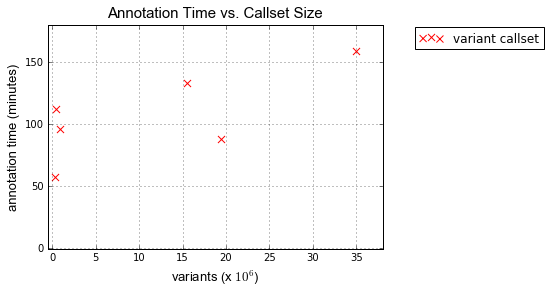

In [61]:
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'13'}

ax = None
for column, label, color in [ 
  ('annotation_time', 'variant callset', 'red'), 
]:
    
    plot_table = time_table[['dataset_type', 'num_variants', 'num_samples', column]] #, 'num_variants']]
    limitx, limity = (38, 180)
    #plot_table = plot_table[plot_table['dataset_type'] == 'wes']; limitx = 
    plot_table[column] = plot_table[column]
    plot_table['num_variants'] = time_table['num_variants']/10**6
    #plot_table = plot_table.set_index(time_table['num_variants']).sort_index()
    ax = plot_table.plot(kind='scatter', x='num_variants', y=column, ax=ax, label=label, color=color, marker='x', s=50) #plot_table['num_samples'])
    ax.get_legend().set_title(None)
    ax.set_xlim((-0.5, limitx))
    ax.set_ylim((-0.5, limity))
    
    ax.grid(which='major')

    ax.set_xlabel("variants (x $10^6$)", **axis_font)
    ax.set_ylabel("annotation time (minutes)", **axis_font)
    ax.legend(bbox_to_anchor=(1.5, 1.02))
    ax.set_title("Annotation Time vs. Callset Size", **title_font)

    

#    plot_table.plot(kind='scatter', x=['num_variants'], y=['solr_with_index_only', 'solr_with_index_only__single_collection', 'solr_with_ref_stored'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


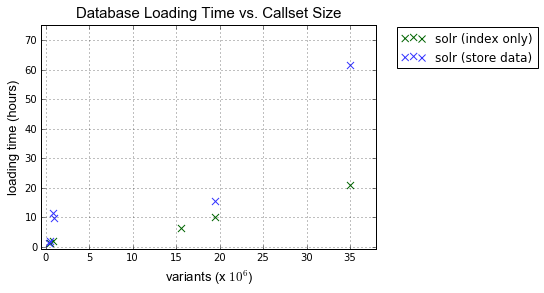

In [62]:
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'13'}

ax = None
for column, label, color in [ 
  ('solr_with_index_only', 'solr (index only)', 'DarkGreen'), 
 # ('solr_with_index_only__single_collection', 'solr (index only)', '#22aa00'),
  ('solr_with_ref_stored', 'solr (store data)', '#3333ff'),
  #('mongodb', 'mongodb', 'purple'), 
]:
    
    plot_table = time_table[['dataset_type', 'num_variants', 'num_samples', column]] #, 'num_variants']]
    limitx, limity = (38, 75)
    #plot_table = plot_table[plot_table['dataset_type'] == 'wes']; limitx = 
    plot_table[column] = plot_table[column]/60
    plot_table['num_variants'] = time_table['num_variants']/10**6
    #plot_table = plot_table.set_index(time_table['num_variants']).sort_index()
    ax = plot_table.plot(kind='scatter', x='num_variants', y=column, ax=ax, label=label, color=color, marker='x', s=50) #plot_table['num_samples'])
    ax.get_legend().set_title(None)
    ax.set_xlim((-0.5, limitx))
    ax.set_ylim((-0.5, limity))
    
    ax.grid(which='major')

    ax.set_xlabel("variants (x $10^6$)", **axis_font)
    ax.set_ylabel("loading time (hours)", **axis_font)
    ax.legend(bbox_to_anchor=(1.5, 1.02))
    ax.set_title("Database Loading Time vs. Callset Size", **title_font)

    

#    plot_table.plot(kind='scatter', x=['num_variants'], y=['solr_with_index_only', 'solr_with_index_only__single_collection', 'solr_with_ref_stored'])

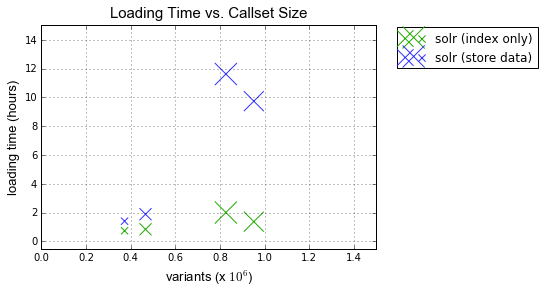

In [40]:
ax = None
for column, label, color in [ 
  #('solr_with_index_only', 'solr (index only)', 'DarkGreen'), 
  ('solr_with_index_only__single_collection', 'solr (index only)', '#22aa00'),
  ('solr_with_ref_stored', 'solr (store data)', '#3333ff'),
#  ('mongodb', 'mongodb', 'red'), 
]:
    
    plot_table = time_table[['dataset_type', 'num_variants', 'num_samples', column]] #, 'num_variants']]
    limitx, limity = (38, 70)
    plot_table = plot_table[plot_table['dataset_type'] == 'wes']; limitx, limity = 1.5, 15
    plot_table[column] = plot_table[column]/60
    plot_table['num_variants'] = time_table['num_variants']/10**6
    #plot_table = plot_table.set_index(time_table['num_variants']).sort_index()
    ax = plot_table.plot(kind='scatter', x='num_variants', y=column, ax=ax, label=label, color=color, marker='x', s=plot_table['num_samples']/2.5)
    ax.get_legend().set_title(None)
    ax.set_xlim((0, limitx))
    ax.set_ylim((-0.5, limity))
    
    ax.grid(which='major')

    ax.set_xlabel("variants (x $10^6$)", **axis_font)
    ax.set_ylabel("loading time (hours)", **axis_font)
    ax.legend(bbox_to_anchor=(1.5, 1.02))
    ax.set_title("Loading Time vs. Callset Size", **title_font)

    

    #plot_table.plot(kind='scatter', x=['num_variants'], y=['solr_with_index_only', 'solr_with_index_only__single_collection', 'solr_with_ref_stored'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


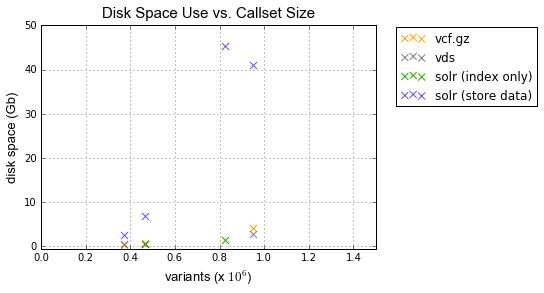

In [64]:
title_font = {'fontname':'Arial', 
              'size':'15', 
              'color':'black', 
              'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'13'}

ax = None
for column, label, color in [ 
  ('vcf.gz', 'vcf.gz', 'orange'), 
  
  ('vds', 'vds', 'grey'), 
  
  ('solr_with_index_only', 'solr (index only)', '#22aa00'), 
  #('solr_with_index_only__single_collection', 'solr (index only, single-collection)', '#11cc00'),
  ('solr_with_ref_stored', 'solr (store data)', '#5555ff'), 
#  ('mongodb', 'mongodb', 'red'), 
]:
    
    plot_table = disk_usage_table[['num_variants', column, 'dataset_type']] #, 'num_variants']]
    #plot_table[column] = plot_table[column]
    plot_table['num_variants'] = disk_usage_table['num_variants']/10**6
    plot_table = plot_table[plot_table['dataset_type'] == 'wes']; limitx, limity = 1.5, 15
    plot_table[column] = disk_usage_table[column]/10**6
    #plot_table = plot_table.set_index(time_table['num_variants']).sort_index()
    ax = plot_table.plot(kind='scatter', x='num_variants', y=column, ax=ax, label=label, color=color, marker='x', s=50)
    ax.set_xlabel("variants (x $10^6$)", **axis_font)
    ax.set_ylabel("disk space (Gb)", **axis_font)
    ax.legend(bbox_to_anchor=(1.5, 1.02))
    ax.set_title("Disk Space Use vs. Callset Size", **title_font)
    l = ax.get_legend()
    
    l.set_title(None)
    ax.set_xlim((0, 1.5))
    ax.set_ylim((-0.5, 50))
    
    ax.grid(which='major')

    #plot_table.plot(kind='scatter', x=['num_variants'], y=['solr_with_index_only', 'solr_with_index_only__single_collection', 'solr_with_ref_stored'])

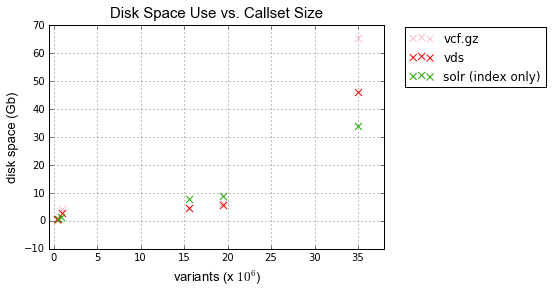

In [437]:

ax = None
for column, label, color in [ 
  ('vcf.gz', 'vcf.gz', 'pink'), 
  ('vds', 'vds', 'red'), 
  ('solr_with_index_only', 'solr (index only)', '#22aa00'), 
  #('solr_with_index_only__single_collection', 'solr (index only, single-collection)', '#11cc00'),
  #('solr_with_ref_stored', 'solr (store data)', '#5555ff'), 


#  ('mongodb', 'mongodb', 'red'), 
]:
    
    plot_table = disk_usage_table[['num_variants', column]] #, 'num_variants']]
    #plot_table[column] = plot_table[column]
    plot_table['num_variants'] = disk_usage_table['num_variants']/10**6
    plot_table[column] = disk_usage_table[column]/10**6
    #plot_table = plot_table.set_index(time_table['num_variants']).sort_index()
    ax = plot_table.plot(kind='scatter', x='num_variants', y=column, ax=ax, label=label, color=color, marker='x', s=50)
    ax.set_xlabel("variants (x $10^6$)", **axis_font)
    ax.set_ylabel("disk space (Gb)", **axis_font)
    ax.legend(bbox_to_anchor=(1.5, 1.02))
    ax.set_title("Disk Space Use vs. Callset Size", **title_font)
    l = ax.get_legend()
    
    l.set_title(None)
    ax.set_xlim((-0.5, 38))
    #ax.set_ylim((-0.5, 70))
    
    ax.grid(which='major')

    #plot_table.plot(kind='scatter', x=['num_variants'], y=['solr_with_index_only', 'solr_with_index_only__single_collection', 'solr_with_ref_stored'])